# Two Qubits

<h3>Operators on two qubits</h3>

We define a quantum circuit with two qubits and apply the Hadamard operator to each of them.

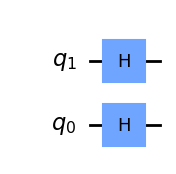

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

qc.draw(output='mpl',reverse_bits=True)

These two Hadamards can also be represented as a single quantum operator on two qubits: $ H \otimes H $. 

$$
   H^{\otimes 2} = H \otimes H = \hadamard \otimes \hadamard = \Htwo .
$$

<h3> Unitary backend</h3>

Unitary_simulator gives a single matrix representation of all gates in the circuit until that point.

    job = execute(circuit, Aer.get_backend('unitary_simulator'),optimization_level=0)
    current_unitary = job.result().get_unitary(circuit, decimals=3).data
    print(current_unitary)

In [3]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3).data
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(entry.real) + " "
    print(column)

0.5 0.5 0.5 0.5 
0.5 -0.5 0.5 -0.5 
0.5 0.5 -0.5 -0.5 
0.5 -0.5 -0.5 0.5 


<h3> Task 1 </h3>

We define a quantum circuit with two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.

We apply the Hadamard operator to $q_1$.

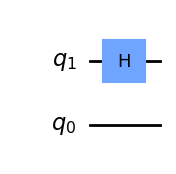

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
display(qc.draw(output='mpl',reverse_bits=True))

Then, the quantum operator applied to both qubits will be $ H \otimes I $.

Read the quantum operator of the above circuit by using 'unitary_simulator' and then verify that it is $ H \otimes I $.

$ H \otimes I = \hadamard \otimes \I =  \mymatrix{c|c}{ \sqrttwo \I & \sqrttwo \I \\ \hline \sqrttwo \I & -\sqrttwo \I } = \mymatrix{rr|rr} { \sqrttwo & 0 & \sqrttwo & 0 \\ 0 & \sqrttwo & 0 & \sqrttwo \\ \hline \sqrttwo & 0 & -\sqrttwo & 0 \\ 0 & \sqrttwo & 0 & -\sqrttwo } $

In [5]:
from qiskit import execute, Aer

job = execute(qc, Aer.get_backend('unitary_simulator'),shots=1,optimization_level=0)
current_unitary = job.result().get_unitary(qc, decimals=3).data
for row in current_unitary:
    column = ""
    for entry in row:
        column = column + str(round(entry.real,3)) + " "
    print(column)

0.707 0.0 0.707 0.0 
0.0 0.707 0.0 0.707 
0.707 0.0 -0.707 0.0 
0.0 0.707 0.0 -0.707 


<h3> CNOT operator </h3>

CNOT is an operator defined on two qubits:

$$
    CNOT = \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} .
$$

Its effect is very simple: if the state of the first qubit is one, then the state of the second qubit is flipped. 

If the state of the first qubit is zero, then the state of the second qubit remains the same. 

In summary:
<ul>
    <li>$ CNOT \ket{00} = \ket{00} $, </li>
    <li>$ CNOT \ket{01} = \ket{01} $, </li>
    <li>$ CNOT \ket{10} = \ket{11} $, and, </li>
    <li>$ CNOT \ket{11} = \ket{10} $. </li>
</ul>

CNOT refers to as Controlled-NOT: NOT operator is applied in a controlled way.

<h3> cx-gate </h3>

In Qiskit, CNOT operator is represented as cx-gate.

It takes two arguments: controller-qubit and target-qubit.

Its implementation is as follows:

<i> <b>x-gate</b> (NOT operator) is applied to <u>the target qubit</u> that is <b>CONTROLLED</b> by <u>the controller qubit</u>.</i> 

We apply CNOT operator to the states $ \ket{00}, \ket{01}, \ket{10}, \ket{11} $ and then measure each.

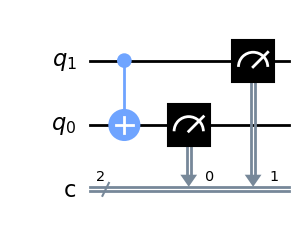

00 --CNOT-> {'00': 1024}


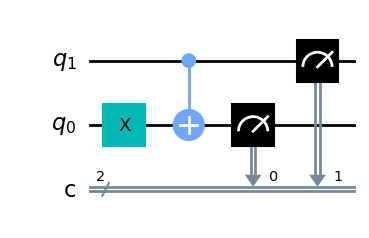

01 --CNOT-> {'01': 1024}


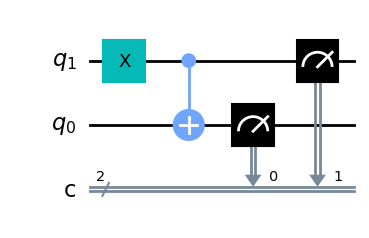

10 --CNOT-> {'11': 1024}


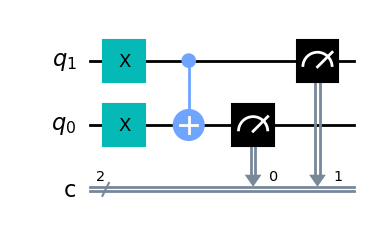

11 --CNOT-> {'10': 1024}


In [8]:
pairs = ['00','01','10','11']

for pair in pairs:
    from qiskit import QuantumCircuit, execute, Aer
    qc = QuantumCircuit(2,2)

    if pair[1] == '1':
        qc.x(0)
    if pair[0] =='1':
        qc.x(1)
    qc.cx(1,0)
    qc.measure(0,0)
    qc.measure(1,1)
    display(qc.draw(output='mpl',reverse_bits=True))
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
    counts = job.result().get_counts(qc)
    print(pair,"--CNOT->",counts)

<h3> Task 2 </h3>

Create a quantum curcuit with $ n=5 $ qubits.

Set each qubit to $ \ket{1} $.

Repeat 4 times:
<ul>
    <li>Randomly pick a pair of qubits, and apply cx-gate (CNOT operator) on the pair.</li>
</ul>

Draw your circuit, and execute your program 100 times.

Verify your measurement results by checking the diagram of the circuit. 

the indices of the controller and target qubits are 1 2
the indices of the controller and target qubits are 0 2
the indices of the controller and target qubits are 2 4
the indices of the controller and target qubits are 4 0


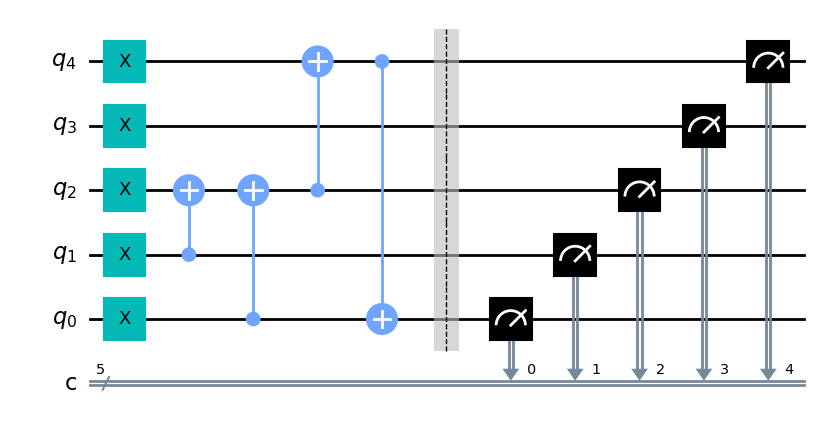

the measurument result is {'01111': 100}
our result is 01111


In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

n = 5
m = 4

states_of_qubits = []

q =  QuantumRegister(n,"q")
c = ClassicalRegister(n,"c")

qc = QuantumCircuit(q,c)

# set each qubit to |1>
for i in range(n):
    qc.x(q[i])
    states_of_qubits.append(1)
    
# randomly pick m pairs of qubits
for i in range(m):
    controller_qubit = randrange(n)
    target_qubit = randrange(n)
    # controller and target qubits should be different
    while controller_qubit == target_qubit: # if they are the same, we pick the target_qubit again
        target_qubit = randrange(n)

    print("the indices of the controller and target qubits are",controller_qubit,target_qubit)
    qc.cx(q[controller_qubit],q[target_qubit])
  
    if states_of_qubits[controller_qubit] == 1: # if the value of the controller qubit is 1,
        states_of_qubits[target_qubit] = 1 - states_of_qubits[target_qubit] # then flips the value of the target qubit 
        # remark that 1-x gives the negation of x
    
qc.barrier()
qc.measure(q,c)

display(qc.draw(output='mpl',reverse_bits=True))

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print("the measurument result is",counts)

our_result=""
for state in states_of_qubits:
    our_result = str(state) + our_result
print("our result is",our_result)

<h3>Task 3</h3>

Our task is to learn the behavior of the following quantum circuit by doing experiments.

Our circuit has two qubits: $ q_0 $ and $ q_1 $. They are tensored as $ q_1 \otimes q_0 $ in Qiskit.
<ul>
    <li> Apply CNOT($q_1$,$q_0$).
    <li> Apply CNOT($q_0$,$q_1$).
    <li> Apply CNOT($q_1$,$q_0$).
</ul>

Iteratively initialize  the qubits to $ \ket{00} $, $ \ket{01} $, $ \ket{10} $, and $ \ket{11} $.

Execute your program 100 times for each iteration, and then check the outcomes for each iteration. 

Observe that the overall circuit swaps the values of the first and second qubits:
<ul>
    <li> $\ket{00} \rightarrow \ket{00} $ </li>
    <li> $\ket{01} \rightarrow \ket{10} $ </li>
    <li> $\ket{10} \rightarrow \ket{01} $ </li>
    <li> $\ket{11} \rightarrow \ket{11} $ </li>
</ul>

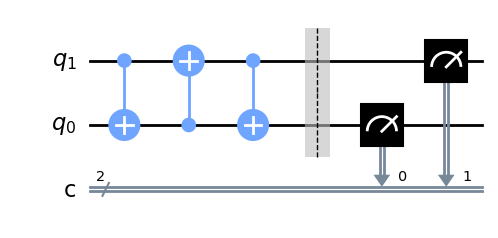

00 is mapped to {'00': 100}


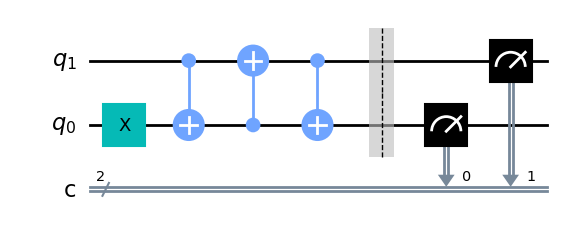

01 is mapped to {'10': 100}


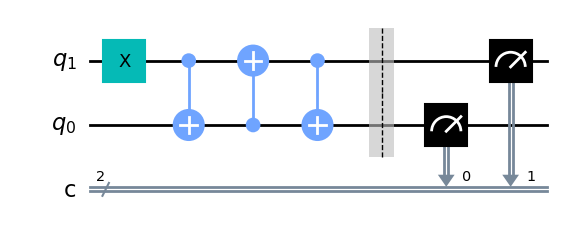

10 is mapped to {'01': 100}


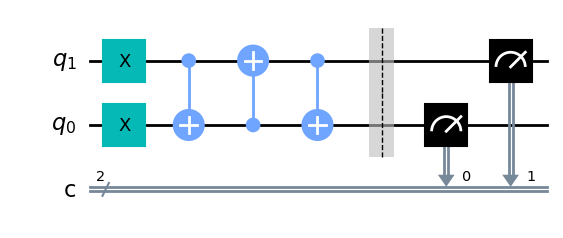

11 is mapped to {'11': 100}


In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=['00','01','10','11']

for input in all_inputs:
    q =  QuantumRegister(2,"q") 
    c = ClassicalRegister(2,"c") 
    qc = QuantumCircuit(q,c)
    
    if input[0]=='1':
        qc.x(q[1]) # set the state of the up qubit to |1>
    if input[1]=='1':
        qc.x(q[0]) # set the state of the down qubit to |1>

    qc.cx(q[1],q[0])
    qc.cx(q[0],q[1])
    qc.cx(q[1],q[0])
    
    qc.barrier()
    qc.measure(q,c)
    
    display(qc.draw(output='mpl',reverse_bits=True))
    
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(input,"is mapped to",counts)

# Phase Kickback

We observe another interesting quantum effect here.

We apply a Controlled-NOT operator, but the controller qubit will be affected!

<h3> Task 1</h3>

Create a quantum circuit with two qubits, say $ q[1] $ and $ q[0] $ in the reading order of Qiskit.

We start in quantum state $ \ket{01} $:
- set the state of $ q[1] $ to $ \ket{0} $, and
- set the state of $ q[0] $ to $ \ket{1} $.

Apply Hadamard to both qubits.

Apply CNOT operator, where the controller qubit is $ q[1] $ and the target qubit is $ q[0] $.

Apply Hadamard to both qubits.

Measure the outcomes.

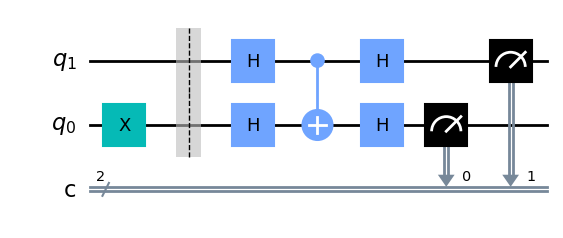

{'11': 100}


In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(2,"q") 
c = ClassicalRegister(2,"c") 
qc = QuantumCircuit(q,c) 

qc.x(q[0]) # apply x-gate (NOT operator)

qc.barrier()

qc.h(q[0])
qc.h(q[1])

# apply CNOT operator, where the controller qubit is the up qubit and the target qubit is the down qubit.
qc.cx(1,0)

qc.h(q[0])
qc.h(q[1])

qc.measure(q,c)

display(qc.draw(output='mpl',reverse_bits=True))

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

CNOT flips the state of the down qubit.

After CNOT, we have:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{1} - \frac{1}{\sqrt{2}} \ket{0}  }
$$

Remark that $\ket{0}$ and $ \ket{1} $ are swapped in the second qubit.

If we write the quantum state of the down qubit as before, the sign of $ \ket{1} $ in the up qubit should be flipped.

Thus the last equation can be equivalently written as follows:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     -
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

Before CNOT operator, the sign of $ \ket{1} $ in the up qubit is positive. 
    
After CNOT operator, its sign changes to negative.

This is called <b>phase kickback</b>.

<h3> After CNOT </h3>

It is easy to see from the last expression, that the quantum states of the qubits are separable (no correlation):

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} } 
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

If we apply Hadamard to each qubit, both qubits evolve to state $ \ket{1} $.

The final state is $ \ket{11} $.

# Entanglement and Superdense Coding

Asja has a qubit, initially set to $ \ket{0} $.

Balvis has a qubit, initially set to $ \ket{0} $.

<h3> Entanglement </h3>
    
Asja applies Hadamard operator to her qubit. 

The quantum state of Asja's qubit is $ \stateplus $.

Then, Asja and Balvis combine their qubits. Their quantum state is

$ \stateplus \otimes \vzero = \myvector{ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 }  $.


Asja and Balvis apply CNOT operator on two qubits.

The new quantum state is

$ \CNOT \myvector{ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 }  = \myvector{ \frac{1}{\sqrt{2}} \\ 0 \\0 \\ \frac{1}{\sqrt{2}} } = \frac{1}{\sqrt{2}}\ket{00} + \frac{1}{\sqrt{2}}\ket{11}  $.

At this moment, Asja's and Balvis' qubits are correlated to each other.

If we measure both qubits, we can observe either state $ \ket{00} $ or state $ \ket{11} $. 

Suppose that Asja observes her qubit secretly. 
<ul>
    <li> When Asja sees the result $ \ket{0} $, then Balvis' qubit also collapses to state $ \ket{0} $. Balvis cannot observe state $ \ket{1} $. </li>
    <li> When Asja sees the result $ \ket{1} $, then Balvis' qubit also collapses to state $ \ket{1} $. Balvis cannot observe state $ \ket{0} $. </li>
</ul>
    
Experimental results have confirmed that this happens even if there is a physical distance between Asja's and Balvis' qubits. 

It seems correlated quantum particles can "affect each other" instantly, even if they are in the different part of the universe. 

If two qubits are correlated in this way, then we say that they are <b>entangled</b>.

<i> <u>Technical note</u>: 
    
If the quantum state of two qubits can be written as $ \ket{u} \otimes \ket{v} $, then two qubits are not correlated, where $ \ket{u} $ and $ \ket{v} $ are the quantum states of the first and second qubits.

On the other hand, if the quantum state of two qubits cannot be written as $ \ket{u} \otimes \ket{v} $, then there is an entanglement between the qubits.
</i>

<b> Entangled qubits can be useful </b>

<h3> Quantum communication </h3>

After having the entanglement, Balvis takes his qubit and goes away.

Asja will send two classical bits of information by only sending her qubit.

<img src="superdense-coding.jpg" align="left" width="800px">

Now, we describe this protocol.

Asja has two bits of classical information: $ a,b \in \{0,1\} $. 

There are four possible values for the pair $ (a,b) $:  $ (0,0), (0,1), (1,0),\mbox{ or } (1,1) $. 

If $a$ is 1, then Asja applies z-gate, i.e., $ Z = \Z $, to her qubit.

If $b$ is 1, then Asja applies x-gate (NOT operator) to her qubit.

Then, Asja sends her qubit to Balvis.

<h3> After the communication </h3>

Balvis has both qubits.

Balvis applies cx-gate (CNOT operator), where Asja's qubit is the controller.

Then, Balvis applies h-gate (Hadamard operator) to Asja's qubit.

Balvis measures both qubits. 

The measurement result will be exactly $ (a,b) $.

<h3> Task 1</h3>

Verify the correctness of the above protocol.

For each pair of $ (a,b) \in \left\{ (0,0), (0,1), (1,0),(1,1) \right\} $:
- Create a quantum circuit with two qubits: Asja's and Balvis' qubits
- Both are initially set to $ \ket{0} $
- Apply h-gate (Hadamard) to Asja's qubit
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.

<ul>
    <li> If $ a $ is 1, then apply z-gate to Asja's qubit. </li>
    <li> If $ b $ is 1, then apply x-gate (NOT) to Asja's qubit. </li>
</ul>

Assume that Asja sends her qubit to Balvis.
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
- Apply h-gate (Hadamard) to Asja's qubit
- Measure both qubits and compare the results with pair $ (a,b) $

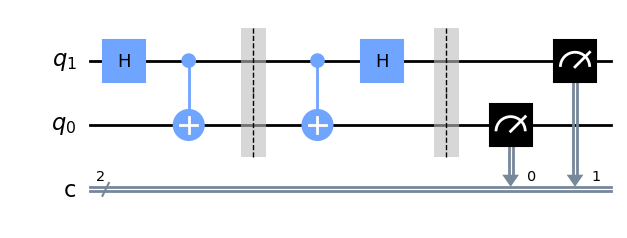

00 --> {'00': 100}


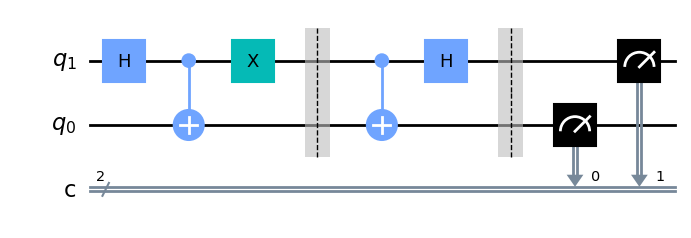

01 --> {'01': 100}


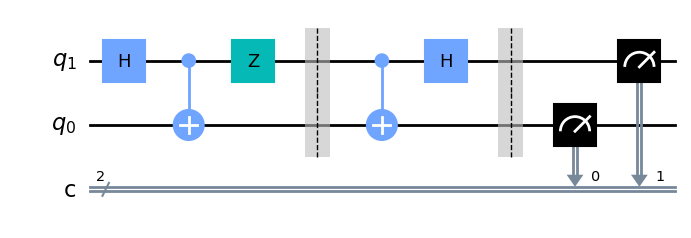

10 --> {'10': 100}


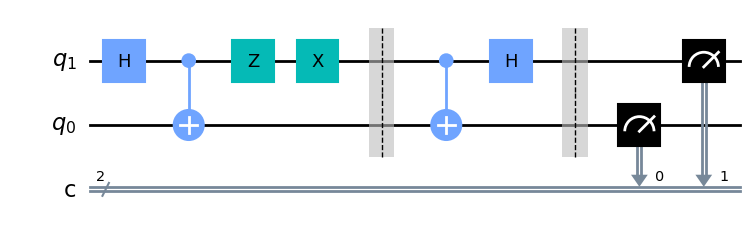

11 --> {'11': 100}


In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q")
    c = ClassicalRegister(2,"c")
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    qc.h(q[1])

    qc.cx(q[1],q[0])

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1': 
        qc.z(q[1])
    
    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1': 
        qc.x(q[1])
    
    # Asja sends her qubit to Balvis
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

<h3> Task 2</h3>

Can the above set-up be used by Balvis?

Verify that the following modified protocol allows Balvis to send two classical bits by sending only his qubit.

For each pair of $ (a,b) \in \left\{ (0,0), (0,1), (1,0),(1,1) \right\} $:
- Create a quantum circuit with two qubits: Asja's and Balvis' qubits
- Both are initially set to $ \ket{0} $
- Apply h-gate (Hadamard) to Asja's qubit
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.

<ul>
    <li> If $ a $ is 1, then apply z-gate to Balvis' qubit. </li>
    <li> If $ b $ is 1, then apply x-gate (NOT) to Balvis' qubit. </li>
</ul>

Assume that Balvis sends his qubit to Asja.
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
- Apply h-gate (Hadamard) to Asja's qubit
- Measure both qubits and compare the results with pair $ (a,b) $

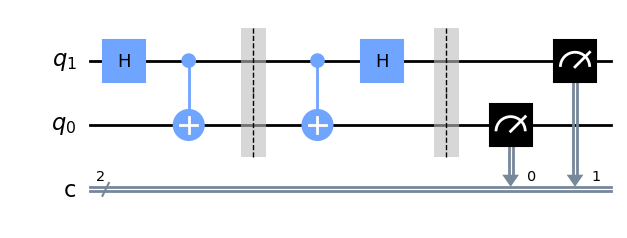

00 --> {'00': 100}


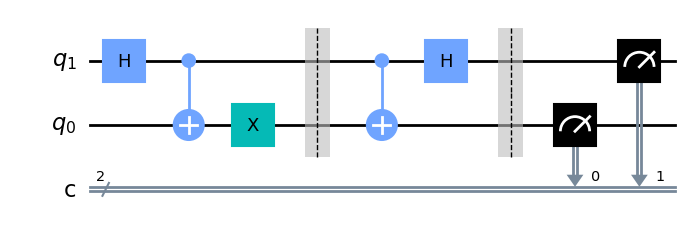

01 --> {'01': 100}


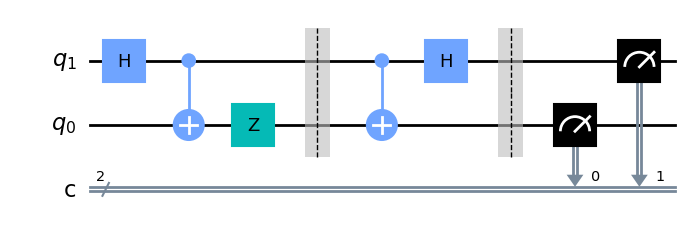

10 --> {'10': 100}


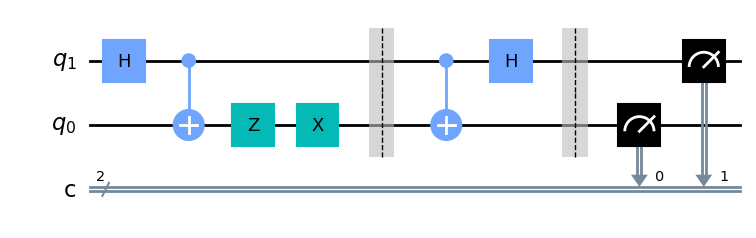

11 --> {'11': 100}


In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q")
    c = ClassicalRegister(2,"c")
    qc = QuantumCircuit(q,c)

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Balvis' qubit
    if pair[0]=='1': 
        qc.z(q[0])
    
    # if b is 1, then apply x-gate (NOT) to Balvis' qubit
    if pair[1]=='1': 
        qc.x(q[0])
    
    # Balvis sends his qubit to Asja
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    qc.barrier()
    qc.measure(q,c)
    
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

# Quantum Teleportation

<hr>

_**Prepare a few blank sheets of paper**_
- _**to draw the circuit of the following protocol step by step and**_
- _**to solve some of tasks requiring certain calculations.**_

<hr>

Asja wants to send a qubit to Balvis by using only classical communication.

Let $ \ket{v} = \myvector{a\\b} \in \mathbb{R}^2 $ be the quantum state.

_Discussion:_ If Asja has many copies of this qubit, then she can collect the statistics based on these qubits and obtain an approximation of $ a $ and $ b $, say $ \tilde{a} $ and $\tilde{b}$, respectively. After this, Asja can send $ \tilde{a} $ and $\tilde{b}$ by using many classical bits, the number of which depends on the precision of the amplitudes. 

On the other hand, If Asja and Balvis share the entangled qubits in state $ \sqrttwo\ket{00} + \sqrttwo\ket{11} $ in advance, then it is possible for Balvis to create $ \ket{v} $ in his qubit after receiving two bits of information from Asja. 

<h3> Protocol </h3>

The protocol uses three qubits as specified below:

<img src='quantum_teleportation_qubits.png' width="25%" align="left">

Asja has two qubits and Balvis has one qubit.

Asja's quantum message (key) is $ \ket{v} = \myvector{a\\b} = a\ket{0} + b\ket{1} $.

The entanglement between Asja's second qubit and Balvis' qubit is  $ \sqrttwo\ket{00} + \sqrttwo\ket{11} $.

So, the quantum state of the three qubits is

$$ \mypar{a\ket{0} + b\ket{1}}\mypar{\sqrttwo\ket{00} + \sqrttwo\ket{11}} 
    = \sqrttwo \big( a\ket{000} + a \ket{011} + b\ket{100} + b \ket{111} \big).  $$

<h4> CNOT operator by Asja </h4>

Asja applies CNOT gate to her qubits where $q[2]$ is the control qubit and $q[1]$ is the target qubit.

<h3>Task 1</h3>

Calculate the new quantum state after this CNOT operator.

The state before CNOT is $ \sqrttwo \big( a\ket{000} + a \ket{011} + b\ket{100} + b \ket{111} \big) $.

CNOT($q[2]$,$q[1]$) is applied.

If the value of the left most qubit is 1, then the value of the middle qubit is flipped.

Thus, the new quantum state after this CNOT is

$$ \sqrttwo \big( a\ket{000} + a \ket{011} + b\ket{110} + b \ket{101} \big). $$

<h3>Hadamard operator by Asja</h3>

Asja applies Hadamard gate to $q[2]$.

<h3>Task 2</h3>

Calculate the new quantum state after this Hadamard operator.

Verify that the resulting quantum state can be written as follows:

$$  
    \frac{1}{2} \ket{00} \big( a\ket{0}+b\ket{1} \big) +
    \frac{1}{2} \ket{01} \big( a\ket{1}+b\ket{0} \big) +
    \frac{1}{2} \ket{10} \big( a\ket{0}-b\ket{1} \big) +
    \frac{1}{2} \ket{11} \big( a\ket{1}-b\ket{0} \big) .
$$

The state before Hadamard is $ \sqrttwo \big( a\ket{000} + a \ket{011} + b\ket{110} + b \ket{101} \big). $

The effect of Hadamard to the left most qubit is given below:

$ H \ket{0yz} \rightarrow \sqrttwo \ket{0yz} + \sqrttwo \ket{1yz} $

$ H \ket{1yz} \rightarrow \sqrttwo \ket{0yz} - \sqrttwo \ket{1yz} $

For each triple $ \ket{xyz} $ in the quantum state, we apply this transformation:

$ 
    \frac{1}{2} \big( a\ket{000} + a\ket{100} \big) + 
    \frac{1}{2} \big( a\ket{011} + a\ket{111} \big) + 
    \frac{1}{2} \big( b\ket{010} - b\ket{110} \big) + 
    \frac{1}{2} \big( b\ket{001} - b\ket{101} \big) .
$

We can rearrange the summation so that we can separate Asja's qubits from the Balvis' qubit:

$ 
    \frac{1}{2} \big( a\ket{000}+b\ket{001} \big) +  
    \frac{1}{2} \big( a\ket{011}+b\ket{010} \big) +  
    \frac{1}{2} \big( a\ket{100} - b\ket{101} \big) + 
    \frac{1}{2} \big( a\ket{111}- b\ket{110} \big)  $.

This is equivalent to

$$  
    \frac{1}{2} \ket{00} \big( a\ket{0}+b\ket{1} \big) +
    \frac{1}{2} \ket{01} \big( a\ket{1}+b\ket{0} \big) +
    \frac{1}{2} \ket{10} \big( a\ket{0}-b\ket{1} \big) +
    \frac{1}{2} \ket{11} \big( a\ket{1}-b\ket{0} \big) .
$$

<h3> Measurement by Asja </h3>

Asja measures her qubits. With probability $ \frac{1}{4} $, she can observe one of the basis states.

Depeding on the measurement outcomes, Balvis' qubit is in the following states:
<ol>
    <li> "00": $ \ket{v_{00}} = a\ket{0} + b \ket{1} $ </li>
    <li> "01": $ \ket{v_{01}} =  a\ket{1} + b \ket{0} $ </li>
    <li> "10": $ \ket{v_{10}} =  a\ket{0} - b \ket{1} $ </li>
    <li> "11": $ \ket{v_{11}} =  a\ket{1} - b \ket{0} $ </li>
</ol>

As can be observed, the amplitudes $ a $ and $ b $ are "transferred" to Balvis' qubit in each case.

If Asja sends the measurement outcomes, then Balvis can construct $ \ket{v} $ exactly.

<h3>Task 3</h3>

Asja sends the measurement outcomes to Balvis by using two classical bits: $ x $ and $ y $. 

For each $ (x,y) $ pair, determine the quantum operator(s) that Balvis can apply to obtain $ \ket{v} = a\ket{0}+b\ket{1} $ exactly.

<b>Measurement outcome "00":</b> The state of Balvis' qubit is $ a\ket{0}+b\ket{1} $. 

Balvis does not need to apply any extra operation.

<b>Measurement outcome "01":</b> The state of Balvis' qubit is $ a\ket{1}+b\ket{0} $. 

If Balvis applies <u>NOT operator</u>, then the state becomes: $ a\ket{0}+b\ket{1} $.

<b>Measurement outcome "10":</b> The state of Balvis' qubit is $ a\ket{0}-b\ket{1} $. 

If Balvis applies <u>Z operator</u>, then the state becomes: $ a\ket{0}+b\ket{1} $.

<b>Measurement outcome "11":</b> The state of Balvis' qubit is $ a\ket{1}-b\ket{0} $. 

If Balvis applies <u>NOT operator</u> and <u>Z operator</u>, then the state becomes: $ a\ket{0}+b\ket{1} $.

<h3> Task 4 </h3>

Create a quantum circuit with three qubits as described at the beginning of this notebook and two classical bits.

Implement the protocol given above until Asja makes the measurements (included).
- The state of $q[2]$ can be set by the rotation with a randomly picked angle.
- Remark that Balvis does not make the measurement.

At this point, read the state vector of the circuit by using "statevector_simulator". 

_When a circuit having measurement is simulated by "statevector_simulator", the simulator picks one of the outcomes, and so we see one of the states after the measurement._

Verify that the state of Balvis' qubit is in one of these: $ \ket{v_{00}}$, $ \ket{v_{01}}$, $ \ket{v_{10}}$, and $ \ket{v_{11}}$.

Guess the measurement outcome obtained by "statevector_simulator".

the picked angle is 183.6 degrees and 3.204424506661589 radians
a= -0.998 b= -0.063
a*a= 0.996 b*b= 0.004


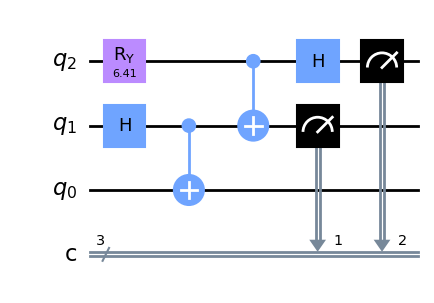

the state vector is
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.06279051952931335
-0.9980267284282714

the classical outcome is 11

the new quantum state is |11>(0.063|0>+-0.998|1>)
the new quantum state is |11>(-b|0>+a|1>)


In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and three bits
q =  QuantumRegister(3,"q") 
c = ClassicalRegister(3,"c") 
qc = QuantumCircuit(q,c)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,3),"b=",round(b,3))
print("a*a=",round(a**2,3),"b*b=",round(b**2,3))
qc.ry(2*theta,q[2])

# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

# the measurement done by Asja
qc.measure(q[2],c[2])
qc.measure(q[1],c[1])

# draw thw circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc).data
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])
        classical_outcome = classical_outcomes[i]
        balvis_state = [ current_quantum_state[2*i].real,current_quantum_state[2*i+1].real ]
print()
        
readable_quantum_state = "|"+classical_outcome+">"
readable_quantum_state += "("+str(round(balvis_state[0],3))+"|0>+"+str(round(balvis_state[1],3))+"|1>)"
print("the new quantum state is",readable_quantum_state)


all_states = ['000','001','010','011','100','101','110','111']

        
balvis_state_str = "|"+classical_outcome+">("
for i in range(len(current_quantum_state)):
    if abs(current_quantum_state[i].real-a)<0.000001: 
        balvis_state_str += "+a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+a)<0.000001:
        balvis_state_str += "-a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real-b)<0.000001: 
        balvis_state_str += "+b|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+b)<0.000001: 
        balvis_state_str += "-b|"+ all_states[i][2]+">"
balvis_state_str += ")"        
print("the new quantum state is",balvis_state_str)

<h3> Task 5 </h3>

Implement the protocol above by including the post-processing part done by Balvis, i.e., the measurement results by Asja are sent to Balvis and then he may apply $ X $ or $ Z $ gates depending on the measurement results.

We use the classically controlled quantum operators. 

Since we do not make measurement on $ q[0] $, we define only 2 classical bits, each of which can also be defined separated.

    q = QuantumRegister(3)
    c2 = ClassicalRegister(1,'c2')
    c1 = ClassicalRegister(1,'c1')
    qc = QuantumCircuit(q,c1,c2)
    ...
    qc.measure(q[1],c1)
    ...
    qc.x(q[0]).c_if(c1,1) # x-gate is applied to q[0] if the classical bit c1 is equal to 1

Read the state vector and verify that Balvis' state is $ \myvector{a \\ b} $ after the post-processing.

the picked angle is 43.2 degrees and 0.7539822368615503 radians
a= 0.729 b= 0.6845


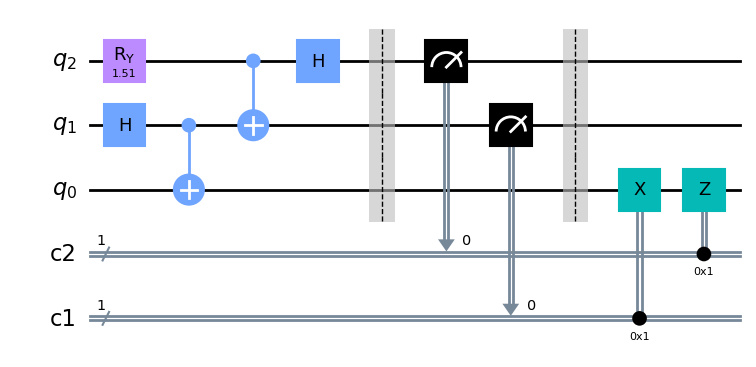

the state vector is
0.0
0.0
0.729
0.6845
-0.0
0.0
0.0
-0.0

the classical outcome is 01


In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and two bits
q =  QuantumRegister(3,"q") 
c1 = ClassicalRegister(1,"c1") 
c2 = ClassicalRegister(1,"c2") 
qc = QuantumCircuit(q,c1,c2)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,4),"b=",round(b,4))
qc.ry(2*theta,q[2])

# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

qc.barrier()

# the measurement done by Asja
qc.measure(q[2],c2)
qc.measure(q[1],c1)

qc.barrier()

# post-processing done by Balvis
qc.x(q[0]).c_if(c1,1)
qc.z(q[0]).c_if(c2,1)

# draw the circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc).data
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(round(current_quantum_state[i].real,4))
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])

<!--
<h3> Task 6 (optional) </h3>

Observe that Balvis can also t

Create a quantum circuit with four qubits and four classical bits.

Assume that Asja has the first two qubits (number 3 and 2) and Balvis has the last two qubits (number 1 and 0).

Create an entanglement between qubits 2 and 1.

Implement the protocol (the state of the qubit can be set by a rotation with randomly picked angle):
- If Asja teleports a qubit, then set the state of qubit 3.
- If Balvis teleports a qubit, then set the state of qubit 0.
-->